# Deep Q Network With PyTorch in Mountain Car Environment

In [24]:
import matplotlib.pyplot as plt

import gymnasium as gym

from rlforge.experiments import ExperimentRunner
from rlforge.agents.semi_gradient import DQNTorchAgent

import torch.nn as nn

In [25]:
env = gym.make("MountainCar-v0")
model = nn.Sequential(
    nn.Linear(2, 256),
    nn.ReLU(),
    nn.Linear(256, env.action_space.n)
)

agent = DQNTorchAgent(
    model=model,
    learning_rate=0.001,
    discount=0.99,
    num_actions=env.action_space.n,
    temperature=0.001,
    target_network_update_steps=1,
    num_replay=4,
    experience_buffer_size=5000,
    mini_batch_size=8,
    device="cpu"  # "cuda" or "cpu"
)


In [26]:
runner = ExperimentRunner(env, agent)

results = runner.run_episodic(
    num_runs=10,
    num_episodes=50,
    max_steps_per_episode=5000
)

runner.summary(last_n=10)

 Experiment Summary (Episodic)
Runs: 10
Average runtime per run: 40.203 seconds
Episodes per run: 50
First episode mean reward: -630.300
Last episode mean reward: -146.800
Overall mean reward: -186.000
Mean reward (last 10 episodes): -144.420
First episode mean steps: 630.3
Last episode mean steps: 146.8
Overall mean steps: 186.0


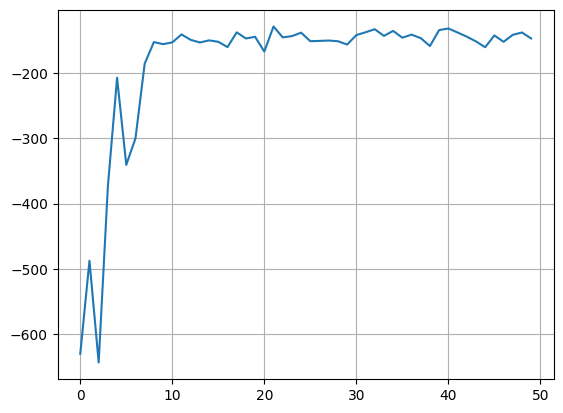

In [27]:
plt.plot(results['mean_rewards'])
plt.grid()

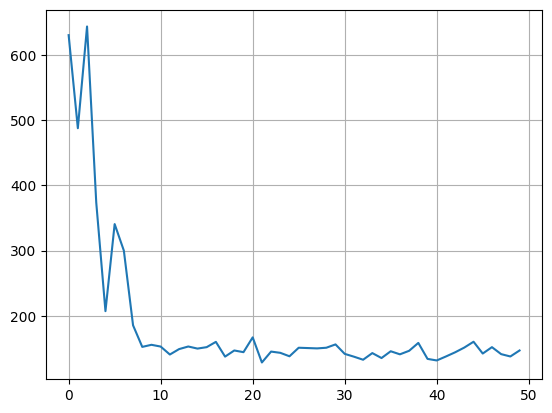

In [28]:
plt.plot(results['mean_steps'])
plt.grid()